### Скачиваем пакеты

In [ ]:
%pip install sklearn
%pip install numpy
%pip install pandas
%pip install seaborn

### Импортируем пакеты

In [2]:
import sklearn
from sklearn import datasets, discriminant_analysis, svm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Убираем предупреждения

In [3]:
warnings.filterwarnings('ignore')

# Часть 1

Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).Визуализировать распределения классов на всех парах переменных.


### Загружаем Iris dataset из sklearn.datasets и конвертируем его в DataFrame из pandas

In [34]:
iris_bunch = sklearn.datasets.load_iris()
# Convert Bunch to DataFrame
iris = pd.DataFrame(data= np.c_[iris_bunch['data'], iris_bunch['target']], # Concat through second axis
                     columns= iris_bunch['feature_names'] + ['target'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Что такое корреляция?

**Корреляция** - это статистическая мера, которая описывает направление и силу взаимосвязи между двумя переменными. Она позволяет определить, насколько две переменные изменяются вместе.

Корреляция измеряется коэффициентом корреляции, который может принимать значения от -1 до 1. Знак коэффициента указывает на направление связи: положительный коэффициент указывает на прямую пропорциональность (увеличение одной переменной сопровождается увеличением другой), а отрицательный коэффициент указывает на обратную пропорциональность (увеличение одной переменной сопровождается уменьшением другой).

Значение коэффициента корреляции ближе к 1 или -1 указывает на сильную корреляцию между переменными, а значение ближе к 0 указывает на слабую или отсутствующую корреляцию.

### Вычисляем корреляцию между признаками по всей таблице (не учитываю целевую переменную)

In [35]:
features = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
correlation_all = features.corr(method='pearson')
display(correlation_all)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Вычисляем корреляцию отдельно по классам

In [36]:
iris_classes = iris.groupby(['target']).corr(method='pearson')
display(iris_classes)

sepal length (cm)  sepal width (cm)  \
target                                                          
0.0    sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1.0    sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2.0    sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0.0    sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1.0    sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2.0    sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

### Визуализируем распределения классов на всех парах переменных

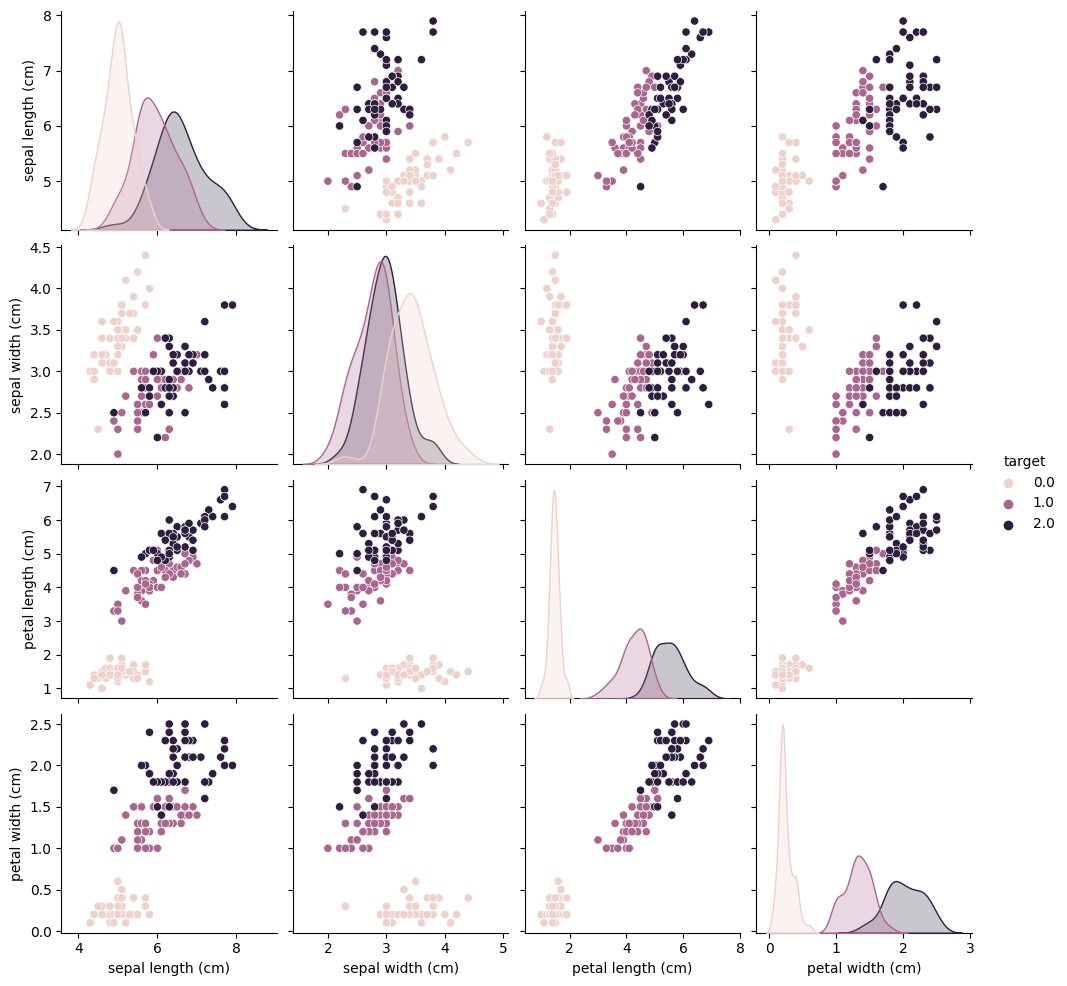

In [37]:
sns.pairplot(iris, hue='target')
plt.show()

# Часть 2

Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

## Определения:

### Разделяющая кривая

**Разделяющая кривая** - это линия, поверхность или гиперплоскость в пространстве признаков, которая разделяет данные разных классов. В задачах классификации, где требуется разделить данные на два или более класса, разделяющая кривая определяет границу между этими классами.

### Дискриминантная ось

**Дискриминантная ось** - это ось в многомерном пространстве, которая наилучшим образом разделяет два или более класса данных. Она используется в задачах классификации, когда необходимо отнести объекты к определенным классам на основе их признаков.

Дискриминантная ось выбирается таким образом, чтобы максимизировать разницу между классами и минимизировать разброс данных внутри каждого класса. Это достигается путем нахождения собственных векторов и собственных значений матрицы ковариации данных.

### Метод линейного дискриминанта (Linear Discriminant Analysis, LDA)


**Метод линейного дискриминанта (Linear Discriminant Analysis, LDA)** - это статистический алгоритм в машинном обучении, который используется для выполнения задачи классификации и измерения сходства между образцами данных. Он основан на статистической модели, которая строит разделяющую гиперплоскость или разделяющую кривую для разделения данных на различные классы. 

Цель метода линейного дискриминанта - найти оптимальную проекцию данных на пространство более низкой размерности, чтобы максимизировать разделение между классами и минимизировать разброс внутри каждого класса. Это достигается путем построения дискриминантных осей, которые максимизируют отношение разброса между классами к разбросу внутри классов.

Процесс работы метода LDA включает в себя следующие шаги:
1. Вычисление средних значений признаков для каждого класса.
2. Вычисление матрицы разброса между классами и матрицы разброса внутри классов.
3. Вычисление обратной матрицы разброса внутри классов.
4. Вычисление проекций данных на дискриминантные оси, определяющие разделяющую гиперплоскость или разделяющую кривую.
5. Классификация новых образцов данных на основе их проекций на дискриминантные оси.

### Метод квадратичного дискриминанта (Quadratic Discriminant Analysis, QDA)


**Метод квадратичного дискриминанта (Quadratic Discriminant Analysis, QDA)** - это статистический алгоритм в машинном обучении, который также используется для решения задач классификации, подобно методу линейного дискриминанта (LDA). Однако, в отличие от LDA, QDA допускает более гибкую модель, предполагая, что разные классы имеют различные ковариационные матрицы.

В методе квадратичного дискриминанта каждый класс моделируется с помощью многомерного нормального распределения и определяется своя ковариационная матрица. Для каждого класса вычисляются параметры распределения, включая средние значения и ковариационные матрицы. При классификации новых образцов данных используются формулы байесовской классификации, учитывающие вероятности принадлежности к каждому классу.

Основные шаги метода квадратичного дискриминанта включают:
1. Вычисление средних значений признаков и ковариационных матриц для каждого класса.
2. Вычисление обратных матриц ковариационных матриц и их определителей.
3. Вычисление дискриминантной функции для каждого класса на основе формулы байесовской классификации.
4. Классификация новых образцов данных путем выбора класса с наибольшей дискриминантной функцией.

### Логистическая регрессия

**Логистическая регрессия** - это статистический метод, используемый для анализа зависимости между категориальной зависимой переменной и одной или несколькими независимыми переменными. Она используется для прогнозирования вероятности наступления определенного события, основываясь на значениях независимых переменных.

В отличие от обычной регрессии, в методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.

В процессе обучения модели логистической регрессии, используется метод максимального правдоподобия, который позволяет оценить параметры модели, максимизирующие вероятность наблюдения имеющихся данных. После обучения модели, она может быть использована для прогнозирования вероятности наступления события для новых наблюдений, основываясь на значениях независимых переменных

### SVM (Метод опорных веторов)

**Метод опорных векторов (SVM)** - это алгоритм машинного обучения, который используется для задач классификации и регрессии. Он основан на поиске гиперплоскости, которая максимально разделяет объекты разных классов в пространстве признаков.

#### Линейное ядро

SVM с линейным ядром использует линейную гиперплоскость для разделения классов. Он ищет гиперплоскость, которая максимизирует расстояние между классами (называемое зазором). Это делает SVM с линейным ядром хорошим выбором для задач с линейно разделимыми классами.

#### Квадратичное ядро

SVM с квадратичным ядром использует квадратичную функцию для преобразования признакового пространства в более высокую размерность. Это позволяет SVM с квадратичным ядром строить более сложные гиперплоскости, которые могут лучше разделять классы в пространстве признаков. Однако, SVM с квадратичным ядром может быть более склонным к переобучению, чем SVM с линейным ядром.

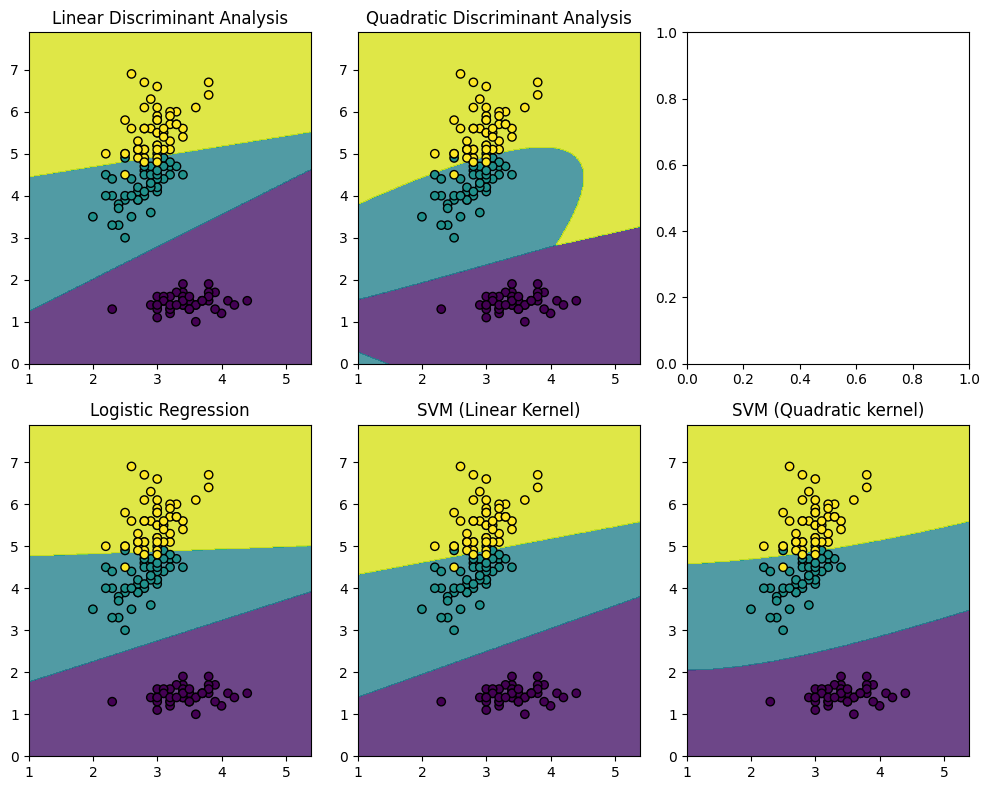

In [272]:
# Выбор двух переменных
X = iris[['sepal width (cm)', 'petal length (cm)']]
y = iris['target']

# Создание решателей
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
lr = sklearn.linear_model.LogisticRegression()
svm_linear = sklearn.svm.SVC(kernel='linear')
svm_quad = sklearn.svm.SVC(kernel='poly', degree=2)

# Обучение моделей
lda.fit(X, y)
qda.fit(X, y)
lr.fit(X, y)
svm_linear.fit(X, y)
svm_quad.fit(X, y)

# Создание сетки для визуализации разделяющих кривых
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
fig, ax = plt.subplots(2, 3, figsize=(10, 8))

# Построение разделяющих кривых

# Линейный дискриминантный анализ
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0, 0].contourf(xx, yy, Z, alpha=0.8)
ax[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[0, 0].set_title('Linear Discriminant Analysis')

# Квадратичный дискриминантный анализ
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0, 1].contourf(xx, yy, Z, alpha=0.8)
ax[0, 1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[0, 1].set_title('Quadratic Discriminant Analysis')

# Логистическая регрессия
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1, 0].contourf(xx, yy, Z, alpha=0.8)
ax[1, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[1, 0].set_title('Logistic Regression')

# SVM с линейным ядром
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1, 1].contourf(xx, yy, Z, alpha=0.8)
ax[1, 1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[1, 1].set_title('SVM (Linear Kernel)')

# SVM с квадратичным ядром
Z = svm_quad.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1, 2].contourf(xx, yy, Z, alpha=0.8)
ax[1, 2].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[1, 2].set_title('SVM (Quadratic kernel)')

plt.tight_layout()
plt.show()

# Часть 3

Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

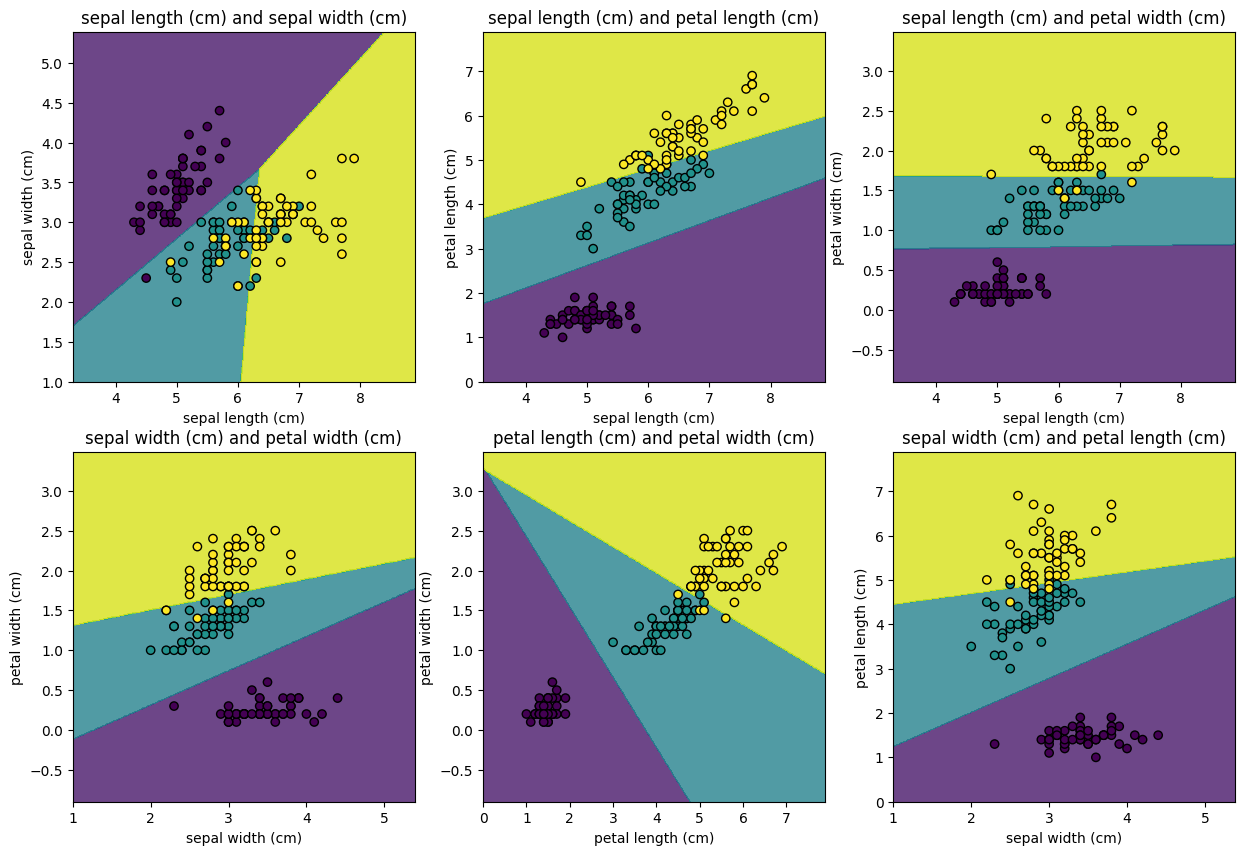

In [128]:
X = iris.iloc[:, 0 : 4]
y = iris['target']

# Создаём решатель
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(4):
    for j in range(i+1, 4):
        # Определяем положение графика на холсте
        ax = axs[(i + 1) // 2, (i+j-1)%3]

        # Создаём сетку
        x_min, x_max = X.iloc[:, i].min() - 1, X.iloc[:, i].max() + 1
        y_min, y_max = X.iloc[:, j].min() - 1, X.iloc[:, j].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
        
        # Переобучаем модель для двух переменных из таблицы
        lda.fit(X.iloc[:, [i, j]], y)
        Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Настраиваем график
        ax.contourf(xx, yy, Z, alpha=0.8)
        ax.scatter(X.iloc[:, i], X.iloc[:, j], c=y, edgecolors='k')
        ax.set_xlabel(iris_bunch.feature_names[i])
        ax.set_ylabel(iris_bunch.feature_names[j])
        ax.set_title(f'{iris_bunch.feature_names[i]} and {iris_bunch.feature_names[j]}')

plt.show()

# Часть 4

На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

Text(0.5, 1.0, 'Quadratic Discriminant Analysis')

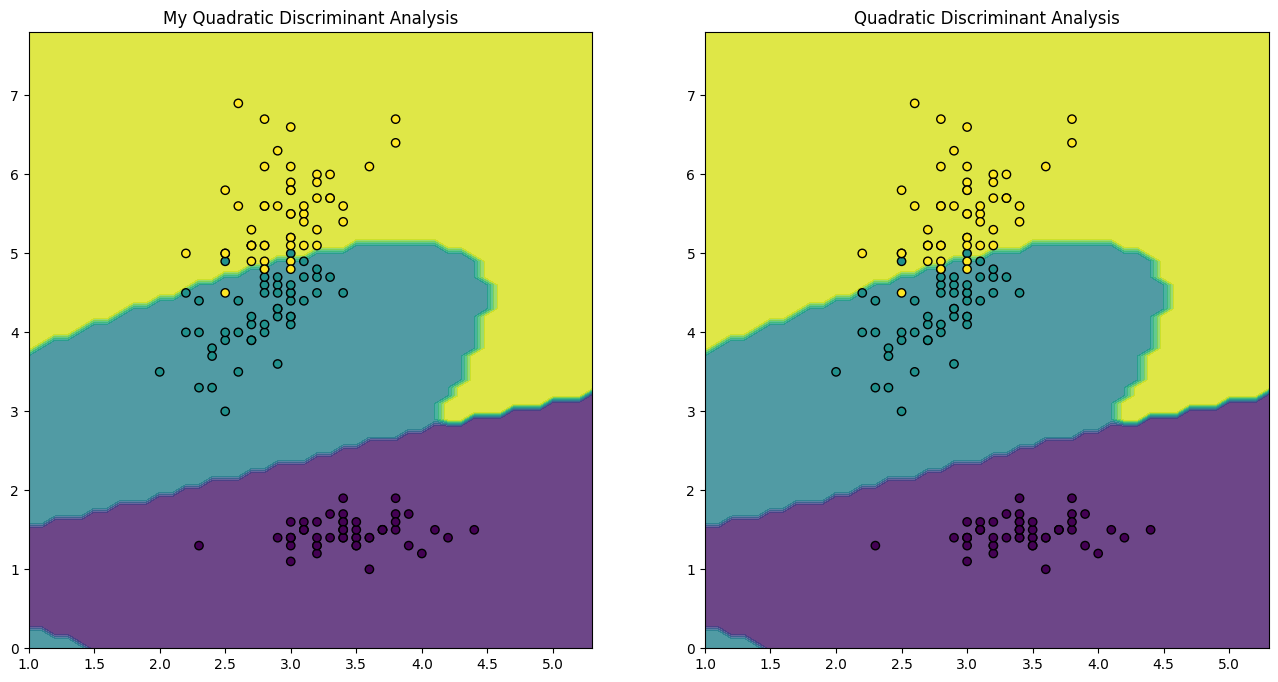

In [271]:
X = iris[['sepal width (cm)', 'petal length (cm)']]
y = iris['target']

covs = []
means = []

for i in range(0, 3):
    covs.append(np.cov(X[y == i].T))
    means.append(np.mean(X[y == i], axis=0))

def quadratic_discriminant_function(x, mean, cov):
    x = x - mean
    cov_inv = np.linalg.inv(cov)
    return -0.5 * np.dot(np.dot(x, cov_inv), x) - 0.5 * np.log(np.linalg.det(cov))

def predict(x):
    data = []
    for pair in x:
        qdf = []
        
        for i in range(0, 3):
            qdf.append(quadratic_discriminant_function(pair, means[i], covs[i]))
        
        data.append(np.argmax(qdf))
    
    return np.array(data)


qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.8)
ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[0].set_title('My Quadratic Discriminant Analysis')

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.8)
ax[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
ax[1].set_title('Quadratic Discriminant Analysis')